# Natural Language Processing

Natural language processing digunakan untuk chatbots, speak recognition, search engine, translate dan masih banyak lagi. contoh metode NLP adalah bag-of-words, seperti yang akan diimplementasikan kode di bawah
NLP yang bersinggunakan dengan deep learning adalah deep learning NLP (DNLP), menggunakan neural network untuk memahami bahasa natural. sub disiplin DNLP adalah seq2seq

##Bag of words

Bag of words pada dasarnya memplot tiap kata ke dalam suatu vektor, sehingga tiap element dari vektor tersebut merepresentasikan jumlah spesifik kata dalam suatu kalimat. vektor tersebut memiliki panjang yang sama dengan jumlah kata yang berbeda dari seluruh kalimat. Jika dipadankan dengan klasifikasi vektor tersebut merupakan input.

contohnya adalah sebagai berikut:

Review 1: This movie is very scary and long

Review 2: This movie is not scary and is slow

Review 3: This movie is spooky and good

bisa dilihat bahwa vector mencakup seluruh kata yang berbeda dari seluruh kalimat

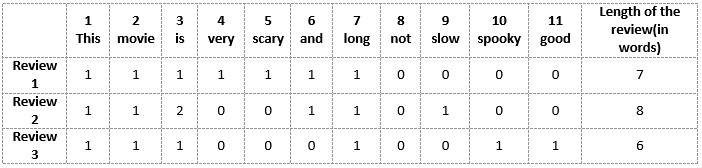

Sebelum training kalimat premis akan dihitung jumlah kata spesifik (pada contoh diatas review 2 mengandung this 1 kali, movie 1 kali serta is 2 kali, dan seterusnya) Masukkan jumlah tiap kata spesifik ini ke dalam suatu vektor (tiap element vektor merepresentasikan kata yang berbeda, sehingga memasukkan jumlah tiap kata spesifik harus sesuai dengan apa yang direpresentasikan elemen tersebut). Proses ini akan dilakukan pada setiap kalimat.

setelah menentukan jumlah kata spesifik pada setiap kalimat, akan dilakukan training dengan klasifikasi. setiap kalimat training terdapat kesan/action (pada contoh yang akan dibahas di bawah setiap kalimat merupakan review restoran dan mepresentasikan positif/suka atau negatif/tidak suka pada restoran tersebut). Karena tiap kalimat premis sudah dijadikan vektor dan vektor merupakan input untuk klasifikasi, maka kita haya perlu mentrain dengan klasifikasi dengan inputnya adalah vektor dan outputnya adalah action

## Importing the libraries

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [54]:
dataset = pd.read_csv('Restaurant_Reviews.tsv',sep='\t')
y=dataset.iloc[:,1].values

## Cleaning the texts

In [55]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()
clean_texts = []
for i in range(0,dataset.shape[0]):
  review=dataset.iloc[i,0]
  review=re.sub('[^a-zA-Z]',' ',review)
  review=review.lower()
  review=review.split()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  clean_texts.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Untuk mengefiensikan resource, maka tiap kalimat diharapkan menghilangkan stopwords (e.g. the,is,it,.) karena kata-kata tersebut kurang penting dan tidak akan berpengaruh pada kesan/action dari kalimat, sehingga dapat mengurangi panjangnya vektor. Untuk meningkatkan keefektifan prediksi, maka tiap kata harus di-stemming. Inti dari stemming adalah mengembalikan kata menjadi kata asalnya. contohnya adalah kata programming diubah menjadi program, kata clearly menjadi clear, dan sebagainya. Alasan mengapa harus begitu adalah agar kata turunan dan kata akar tidak dianggap 2 kata yang berbeda. contohnya adalah jika programming tidak di stem menjadi program, maka 2 kata tersebut dianggap berbeda, padahal memiliki kesan/makna yang sama

stopwords dianggap adalah kata-kata yang tidak dianggap penting, namun berbeda dengan stopword not, kata not dapat memberikan kesan negatif, oleh karena itu kita harus menghapus string not dari stopwords

## Creating the Bag of Words model

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

bw = CountVectorizer()
X=bw.fit_transform(clean_texts).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Splitting the dataset into the Training set and Test set

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

## Training the Naive Bayes model on the Training set

In [59]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train,y_train)

GaussianNB()

## Predicting the Test set results

In [60]:
y_pred=classifier.predict(X_test)

## Making the Confusion Matrix

In [61]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
accuracy_score(y_test,y_pred)

[[ 67  50]
 [ 20 113]]


0.72